<a href="https://colab.research.google.com/github/darkginka/Diet-Recommanded-System/blob/main/DRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Start**

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
import pandas as pd

In [187]:
####### dataset #######
food_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/food_nutrition.csv")
disease_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/disease_nutrition.csv",encoding='unicode_escape')

In [188]:
#food_nutrition.info()
# for col in food_nutrition.columns:
#     print(col)
food_nutrition.head()

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Phosphorus,Potassium,Sodium,Zinc,Vitamin_A,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_E,Vitamin_K
0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,7,0,4.46,14,16.0,0.0,0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,7,0,4.67,12,17.8,0.0,0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


In [189]:
disease_nutrition.info()
# disease_nutrition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   disease_id             92 non-null     int64 
 1   disease                92 non-null     object
 2   ineficient_nutritions  92 non-null     object
 3   Precaution_1           92 non-null     object
 4   Precaution_2           84 non-null     object
 5   Precaution_3           65 non-null     object
 6   Precaution_4           41 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


**Part-1**

In [190]:
####### Methods #######
def get_disease(disease_name):
	if(disease_name not in list(disease_nutrition["disease"])):
		return False
	else:
		return disease_nutrition[disease_nutrition.disease==disease_name]["disease"].values[0]

def get_disease_name(disease_id):
	return disease_nutrition[disease_nutrition.disease_id == disease_id]["disease"].values[0]

def get_disease_id(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["disease_id"].values[0]

def get_disease_ie(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["ineficient_nutritions"].values[0]

In [191]:
####### get-set Data #######
users_disease = input("Enter Disease Name: ")
disease_name = get_disease(users_disease)
if(disease_name==False):
  print("Disease Not Found")
else:
  disease_id = get_disease_id(disease_name)
  i= disease_id-101
  print(disease_nutrition.iloc[i])         
  disease_ie = get_disease_ie(disease_name)
  # print(disease_ie)
#Convert disease-nutritions column value into list
  dis_list = list(disease_ie.split(" "))
#Convert food column into list
  col_list = food_nutrition.columns.values.tolist()
 # print(dis_list)
  for ele in dis_list:
    if(ele==""):
      dis_list.remove(ele)
  print(dis_list)

Enter Disease Name: acne
disease_id                                                             102
disease                                                               acne
ineficient_nutritions    SaturatedFat Fiber Riboflavin Vitamin_A Zinc V...
Precaution_1                                                    bath twice
Precaution_2                                        avoid fatty spicy food
Precaution_3                                         drink plenty of Water
Precaution_4                                       avoid too many products
Name: 1, dtype: object
['SaturatedFat', 'Fiber', 'Riboflavin', 'Vitamin_A', 'Zinc', 'Vitamin_D', 'Vitamin_E']


**Part-2**

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

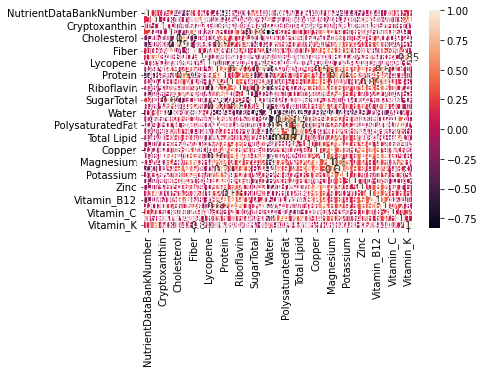

In [193]:
ax = sns.heatmap(food_nutrition.corr(),annot=True)
plt.show()

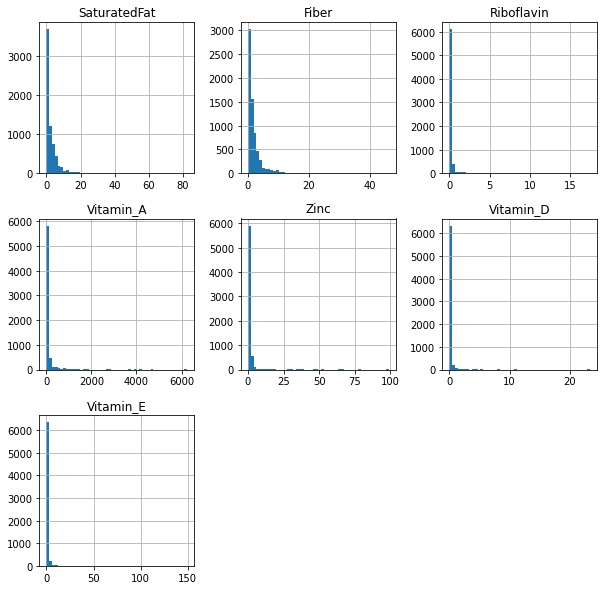

In [194]:
food_nutrition[dis_list].hist(bins=50, figsize=(10,10))
plt.show()

**Preprocessing data**

In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
columns_to_cluster = dis_list

In [197]:
#MinMaxScaler
#Transform features by scaling each feature to a given range.Here is an example to scale a data matrix to the [0, 1] range:
mms = MinMaxScaler()
food_scaled = mms.fit_transform(food_nutrition[columns_to_cluster])
print("Scaled Food Value: ", food_scaled[0,:])

Scaled Food Value:  [0.02435152 0.         0.00205714 0.0097522  0.0017196  0.00059893
 0.00053548]


In [198]:
columns_to_cluster_scaled = dis_list

In [199]:
df_food_scaled = pd.DataFrame(food_scaled, columns=columns_to_cluster_scaled)

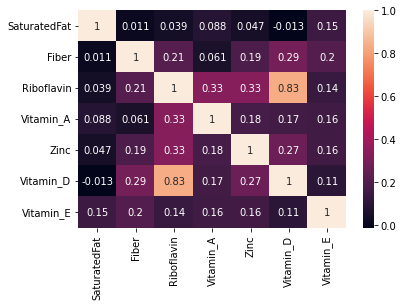

In [200]:
ax = sns.heatmap(df_food_scaled.corr(), annot=True)
plt.show()

**Training the model**

In [201]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [202]:
n_clusters = range(2,21)
ssd = []
sc = []
for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(food_scaled)
    preds = km.predict(food_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(food_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 2, Silhouette Score = 0.6377703197801713
Number of Clusters = 3, Silhouette Score = 0.5871792456100594
Number of Clusters = 4, Silhouette Score = 0.5929653272709893
Number of Clusters = 5, Silhouette Score = 0.3851938731556179
Number of Clusters = 6, Silhouette Score = 0.39432539885734386
Number of Clusters = 7, Silhouette Score = 0.40702476568428386
Number of Clusters = 8, Silhouette Score = 0.36417582666139425
Number of Clusters = 9, Silhouette Score = 0.3723514878174952
Number of Clusters = 10, Silhouette Score = 0.3747458853948939
Number of Clusters = 11, Silhouette Score = 0.37697321858484817
Number of Clusters = 12, Silhouette Score = 0.3896183931290962
Number of Clusters = 13, Silhouette Score = 0.38698192158325445
Number of Clusters = 14, Silhouette Score = 0.34240756750688967
Number of Clusters = 15, Silhouette Score = 0.2939658435603981
Number of Clusters = 16, Silhouette Score = 0.2930703692588652
Number of Clusters = 17, Silhouette Score = 0.30069419142

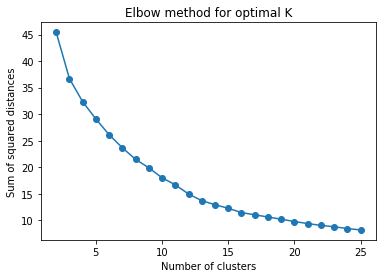

In [ ]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [203]:
k=6
model = KMeans(n_clusters=k, random_state=42).fit(food_scaled)
pred = model.predict(food_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [2 2 2 2 2 2 2 2 2 2]


**Visualizing the clusters**

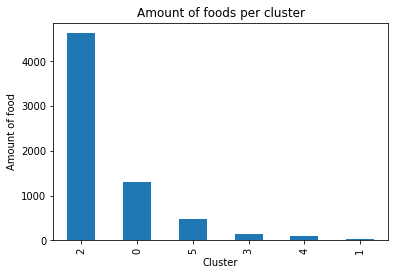

In [204]:
df_food_scaled['cluster'] = model.labels_
df_food_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of food')
plt.title('Amount of foods per cluster')
plt.show()

In [205]:
display(df_food_scaled['cluster'].value_counts())
minor_cluster = df_food_scaled['cluster'].value_counts().tail(1)
print("Amount of food in the smallest cluster: ", int(minor_cluster.values))

2    4629
0    1315
5     479
3     135
4     105
1      28
Name: cluster, dtype: int64

Amount of food in the smallest cluster:  28


In [206]:
df_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0,"Egg omelet or scrambled egg, with meat and dar..."
0,"Ice cream cone, NFS"
0,"Egg omelet or scrambled egg, with cheese and m..."
0,Vegetarian pot pie
0,Soft taco with chicken and sour cream
0,"Egg, yolk only, cooked, NS as to fat"
0,"Double hamburger, on wheat bun, 2 medium patties"
0,"Barfi or Burfi, Indian dessert"
0,"Croissant sandwich with sausage, egg, and cheese"


,Description
cluster,
1,Cereal or granola bar (General Mills Fiber One...
1,Cereal (Uncle Sam)
1,"Nutritional powder mix, high protein (Slim Fast)"
1,Cereal (Kashi GOLEAN)
1,"Wheat bran, unprocessed"
1,"Textured vegetable protein, dry"
1,Chia seeds
1,"Nutritional powder mix, sugar free (Slim Fast)"
1,Yeast


,Description
cluster,
2,"Broccoli, fresh, cooked, fat added, NS as to f..."
2,"Tomato vegetable soup, prepared with water"
2,"Chicken, NS as to part, grilled without sauce,..."
2,"Pie, apricot, two crust"
2,"Pork sandwich, on white roll, with onions, dil..."
2,"Coffee, Iced Cafe Mocha, decaffeinated, nonfat"
2,"Lettuce, salad with cheese, tomato and/or carr..."
2,"Chicken or turkey salad, made with mayonnaise"
2,"Squid, baked or broiled, fat added"


,Description
cluster,
3,"Cereal or granola bar, with coconut, chocolate..."
3,"Toblerone, milk chocolate with honey and almon..."
3,"Cream, heavy"
3,TWIX Caramel Cookie Bars
3,Haupia
3,"Popcorn, movie theater, unbuttered"
3,Chocolate-flavored sprinkles
3,"Cheese quiche, meatless"
3,Whipped topping


,Description
cluster,
4,"Chicken liver, braised"
4,Liverwurst
4,Cereal (Kellogg's Smorz)
4,Cereal (General Mills Golden Grahams)
4,Cereal (General Mills Lucky Charms)
4,"Cereal, ready-to-eat, NFS"
4,Nutrition bar (Balance Original Bar)
4,"Oysters, coated, baked or broiled, no added fat"
4,"Oysters, canned"


,Description
cluster,
5,Black beans and white rice
5,"Fig, dried"
5,"Apricot, dried"
5,"Popcorn, ready-to-eat packaged, NFS"
5,"Sesame Crunch, Sahadi"
5,"Cereal or granola bar, nonfat"
5,Nutrition bar (Clif Kids Organic Zbar)
5,"Edamame, cooked"
5,Multigrain chips (Sun Chips)


**Applying PCA to visualize the clusters**

In [207]:
from sklearn.decomposition import PCA

In [208]:
pca = PCA(n_components=3, random_state=42)
food_pca = pca.fit_transform(food_scaled)
pca.explained_variance_ratio_.sum()

0.8049706487313476

In [212]:
df_pca = pd.DataFrame(food_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

,C1,C2,C3,cluster
0,-0.042362,-0.005529,-0.002430,2
1,-0.042035,-0.015486,0.002056,2
2,-0.041687,-0.007586,-0.002269,2
3,-0.041843,-0.004141,-0.004138,2
4,-0.041687,-0.007586,-0.002269,2


In [213]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

2    28
0    28
3    28
1    28
5    28
4    28
Name: cluster, dtype: int64

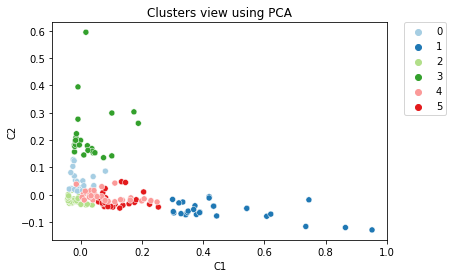

In [214]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

**Predicting users clusters**

In [215]:
user_pred = model.predict(food_scaled)
print('10 first users clusters: ', user_pred[:10])

10 first users clusters:  [2 2 2 2 2 2 2 2 2 2]


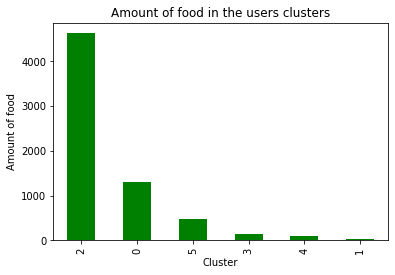

In [216]:
user_cluster = pd.DataFrame(food_scaled, columns=columns_to_cluster_scaled)
user_cluster['cluster'] = user_pred

user_cluster['cluster'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Cluster')
plt.ylabel('Amount of food')
plt.title('Amount of food in the users clusters')
plt.show()

In [217]:
df_user_food_joined = pd.concat([food_nutrition,user_cluster], axis=1).set_index('cluster')
for cluster in user_cluster['cluster'].unique():
    display(df_user_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
2,"Beef with vegetables, baby food, toddler"
2,"Infant formula, powder, made with tap water (G..."
2,Fufu
2,"Asparagus, fresh, cooked, no added fat"
2,Lentil curry with rice
2,"Collards, raw"
2,"Infant formula, liquid concentrate, made with ..."
2,"Chicken drumstick, NS as to cooking method, sk..."
2,"Fruit salad, excluding citrus fruits, with pud..."


,Description
cluster,
0,Safflower oil
0,"Sour cream, regular"
0,Swedish meatballs with cream or white sauce
0,"Enchilada, just cheese, meatless, no beans, re..."
0,"Burrito with beans and rice, meatless"
0,"Cake, Dobos Torte"
0,"Beef taco filling: beef, cheese, tomato, taco ..."
0,"Pretzels, hard, white chocolate coated"
0,"Crackers, cheese, reduced fat"


,Description
cluster,
3,"Coffee creamer,powder, sugar free, flavored"
3,"Cheese, processed, with vegetables"
3,"Cream puff, eclair, custard or cream filled, N..."
3,"Margarine-oil blend, stick"
3,"Shortening, NS as to vegetable or animal"
3,"Cookie, butter or sugar, with chocolate icing ..."
3,"Coconut candy, chocolate covered"
3,"Cookie, coconut"
3,Hollandaise sauce


,Description
cluster,
1,Cereal (General Mills Fiber One)
1,"Wheat bran, unprocessed"
1,"Vegetable mixture, dried"
1,"Cookie, oatmeal, reduced fat, NS as to raisins"
1,"Papad, grilled or broiled"
1,Nutritional powder mix (Kellogg's Special K20 ...
1,Cereal (Uncle Sam)
1,Nutritional powder mix (Slim Fast)
1,"Cocoa powder, not reconstituted"


,Description
cluster,
5,"Beans, from dried, NS as to type, fat added"
5,"Beans, from canned, NS as to type, fat added"
5,"Lima beans, from canned"
5,"Popcorn, ready-to-eat packaged, cheese flavored"
5,"Muffin, English, wheat or cracked wheat"
5,"Crackers, cheese, whole grain"
5,"Green peas, fresh, cooked, fat added, NS as to..."
5,"Artichoke, frozen, cooked, no added fat"
5,"Crackers, wheat, reduced sodium"


,Description
cluster,
4,"Oysters, canned"
4,Cereal (Kellogg's Crispix)
4,Cereal (Malt-O-Meal Fruity Dyno-Bites)
4,"Livers, chicken, chopped, with eggs and onion"
4,Cereal (General Mills Chex Cinnamon)
4,Cereal or granola bar (Kellogg's Nutri-Grain C...
4,Cereal (General Mills Cheerios Apple Cinnamon)
4,"Milk, malted, dry mix, not reconstituted"
4,Cereal (General Mills Cheerios Oat Cluster Cru...


**Recommending Food**

In [218]:
df_user_food_joined.reset_index(inplace=True)
cluster_pct = df_user_food_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)
print('Total food: ', int(cluster_pct.round(0).sum()))

2    13.836497
0     3.930653
5     1.431774
3     1.403527
4     1.313854
1     1.083695
Name: cluster, dtype: float64

Total food:  22


In [220]:
df_food_joined.reset_index(inplace=True)
df_food_joined.head(3)

,index,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,...,Vitamin_C,Vitamin_E,Vitamin_K,SaturatedFat,Fiber,Riboflavin,Vitamin_A,Zinc,Vitamin_D,Vitamin_E
0,0,2,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,...,5.0,0.08,0.3,0.024352,0.0,0.002057,0.009752,0.001720,0.000599,0.000535
1,1,2,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,...,0.1,0.03,0.2,0.014109,0.0,0.007829,0.009432,0.004248,0.002439,0.000201
2,2,2,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,...,0.0,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335


In [221]:
df_user_food_joined['cluster_pct'] = df_user_food_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_food_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_food_joined.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Lutein and Zeaxanthin,...,Iron,Magnesium,Phosphorus,Potassium,Sodium,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_K,cluster_pct
0,2,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0,...,0.03,3,14,51,17,0.05,0.011,5.0,0.3,13.836497
1,2,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0,...,0.00,12,103,157,39,0.56,0.060,0.1,0.2,13.836497
2,2,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0,...,0.00,12,101,150,38,0.54,0.061,0.0,0.3,13.836497


In [222]:
final_Food = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    songs = df_food_joined[df_food_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    final_Food = pd.concat([final_Food,songs], ignore_index=True)
    if len(final_Food) > 20 :
        flag = 20 - len(final_Food)
        final_Food = final_Food[:flag]
final_Food.head(3)

,index,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,...,Vitamin_C,Vitamin_E,Vitamin_K,SaturatedFat,Fiber,Riboflavin,Vitamin_A,Zinc,Vitamin_D,Vitamin_E
0,213,2,Infant formula,"Infant formula, ready-to-feed (Similac Sensitive)",11710371,0,0,6.99,2,15.1,...,5.7,0.89,5.2,0.027855,0.000000,0.005600,0.009432,0.005058,0.002781,0.005957
1,750,2,Chicken leg,"Chicken leg, drumstick and thigh, grilled with...",24134151,24,0,7.28,105,57.8,...,0.1,0.52,5.6,0.022521,0.004329,0.010514,0.001279,0.017803,0.003465,0.003481
2,1117,2,Porgy,"Porgy, raw",26133100,0,0,0.00,52,65.0,...,0.0,0.50,0.1,0.007758,0.000000,0.005714,0.004317,0.004855,0.004706,0.003347


In [223]:
final_Food[['Description']]

,Description
0,"Infant formula, ready-to-feed (Similac Sensitive)"
1,"Chicken leg, drumstick and thigh, grilled with..."
2,"Porgy, raw"
3,"Cornbread, made from home recipe"
4,"Tea, hot, herbal"
5,"Milk, calcium fortified, fat free (skim)"
6,Soft taco with beans
7,Martini
8,"Potato salad with egg, made with light creamy ..."
9,Sports drink (Powerade)
